In [24]:
import numpy as np
import pandas as pd
from interactions_data import create_index, reset_ids
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
path = 'goodbooks-10k/'
url = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
df.shape

(5976479, 3)

In [5]:
n_users = df.user_id.nunique()
n_items = df.book_id.nunique()
max_score = df.rating.max()
min_score = df.rating.min()

In [6]:
print(n_users, df.user_id.max())
print(n_items, df.book_id.max())
print(min_score, max_score)

53424 53424
10000 10000
1 5


### Encode IDs
These ID's start at 1, but need to begin at 0

In [8]:
df['user_id'] = df['user_id'].apply(lambda user_id: user_id-1)
df['book_id'] = df['book_id'].apply(lambda book_id: book_id-1)

In [9]:
df.head()

,user_id,book_id,rating
0,0,257,5
1,1,4080,4
2,1,259,5
3,1,9295,5
4,1,2317,3


### EDA

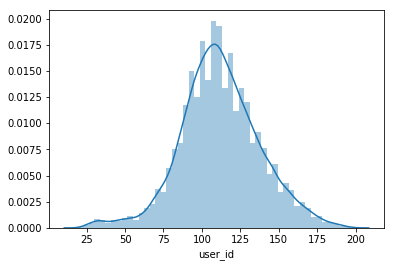

Max ratings by single user: 200
Min ratings by single user: 19
Avg number of ratings per user: 112


In [31]:
user_counts = df['user_id'].value_counts()

sns.distplot(user_counts)
plt.show()

# user with most ratings
print('Max ratings by single user:',
      user_counts.max())

# user with fewest ratings
print('Min ratings by single user:',
      user_counts.min())

# average number of ratings per user
print('Avg number of ratings per user:',
      round(user_counts.mean()))

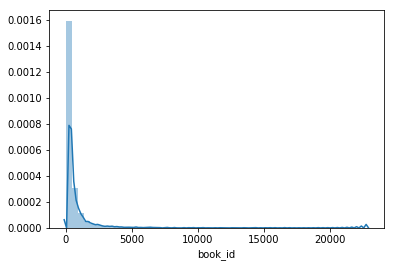

Max ratings of single book: 22806
Min ratings of single book: 8
Avg number of ratings per book: 598


In [37]:
book_counts = df['book_id'].value_counts()

sns.distplot(book_counts)
plt.show()

# book with most ratings
print('Max ratings of single book:',
      book_counts.max())

# book with fewest ratings
print('Min ratings of single book:',
      book_counts.min())

# average number of ratings per book
print('Avg number of ratings per book:',
      round(book_counts.mean()))

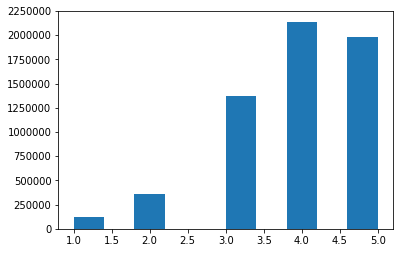

Avg rating: 3.92


In [40]:
sns.distplot(df['rating'].values, kde=False, bins=5)
plt.show()


print('Avg rating:', round(df['rating'].mean(),2))

### Train / test split

In [41]:
train, test, _, _ = train_test_split(df, df.rating,
                                     test_size = .2,
                                     random_state=42,
                                     stratify=df.user_id)

In [42]:
train.shape

(4781183, 3)

In [43]:
test.shape

(1195296, 3)

In [44]:
train.to_csv(path+'train.csv', index=False)
test.to_csv(path+'test.csv', index=False)